In [30]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath("../../mathematical_models"))
from mathematical_models.f_on_f import FunctionOnFunctionModel

sys.path.append(os.path.abspath("../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous
from optimizers.cordex_discrete import CordexDiscrete

sys.path.append(os.path.abspath("../../utilities"))
from utilities.plotting.plot_fun import subplot_results, subplot_b_spline_results

### Settings

In [31]:
N = 4 # runs
Kx_family = 'step'
Kx = [[6]]
Kb = [[2]] # Polynomial
Ky = 2
epochs = 100
refinement_epochs = 100
lvls = [-1, 0, 1]
Sigma_decay = 0
f_on_f_model = FunctionOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, Ky=Ky, Sigma_decay=Sigma_decay)

### J matrix

In [32]:
f_on_f_model.J_cb

array([[1.        , 0.        , 0.        ],
       [0.        , 0.16666667, 0.01388889],
       [0.        , 0.16666667, 0.04166667],
       [0.        , 0.16666667, 0.06944444],
       [0.        , 0.16666667, 0.09722222],
       [0.        , 0.16666667, 0.125     ],
       [0.        , 0.16666667, 0.15277778]])

### Sigma matrix

In [33]:
f_on_f_model.Sigma

array([[1., 0.],
       [0., 1.]])

### Optimize design

In [34]:
optimizer_f_on_f = CordexDiscrete(model=f_on_f_model, runs=N, levels=lvls)
best_design_f_on_f, best_objective_value_f_on_f = optimizer_f_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 339.35it/s]


Best objective value (A): 17.5


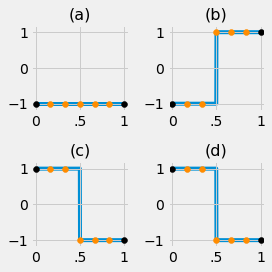

In [35]:
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 500), results=best_design_f_on_f, style='fivethirtyeight', save=False)
print(f'Best objective value (A): {np.round(best_objective_value_f_on_f,2)}')

## B-spline for X

### Extra Settings needed for B-spline

In [21]:
k_degree = 1
Kx_family = 'b-spline'

In [22]:
f_on_f_model = FunctionOnFunctionModel(Kx=Kx[0], Kb= Kb[0], Kx_family=Kx_family, Ky=Ky, Sigma_decay=Sigma_decay, k_degree=k_degree)
f_on_f_model.get_Jcb()

array([[1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.08333333, 0.00462963],
       [0.        , 0.16666667, 0.02777778],
       [0.        , 0.16666667, 0.05555556],
       [0.        , 0.16666667, 0.08333333],
       [0.        , 0.16666667, 0.11111111]])

In [23]:
optimizer_f_on_f = CordexDiscrete(model=f_on_f_model, runs=N, levels=lvls)
best_design_f_on_f, best_objective_value_f_on_f = optimizer_f_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:01<00:00, 78.87it/s]


In [24]:
f_on_f_model.knots_num

7

In [25]:
best_design_f_on_f

array([[ 0.60044634,  1.        ,  1.        , -1.        , -1.        ,
        -1.        ],
       [ 0.70295496, -1.        , -1.        , -1.        ,  1.        ,
         1.        ],
       [ 0.34644383, -1.        , -1.        , -1.        ,  1.        ,
         1.        ],
       [-0.67839256,  1.        ,  1.        ,  1.        ,  1.        ,
        -1.        ]])

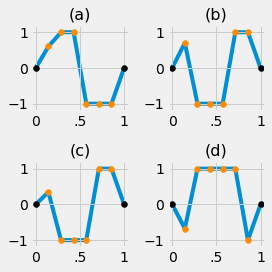

Best objective value (A): 45.33


In [26]:
subplot_b_spline_results(2, 2, np.linspace(0,1,1000), best_design_f_on_f, k_degree)
print(f'Best objective value (A): {np.round(best_objective_value_f_on_f,2)}')

### Continuous

In [14]:
optimizer_f_on_f = CordexContinuous(model=f_on_f_model, runs=N)
best_design_f_on_f, best_objective_value_f_on_f = optimizer_f_on_f.optimize(epochs=epochs)

100%|██████████| 100/100 [00:00<00:00, 167.52it/s]


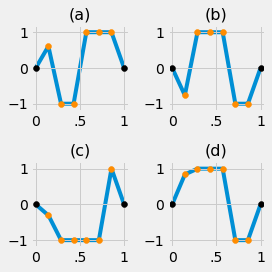

Best objective value (A): 45.33


In [15]:
subplot_b_spline_results(2, 2, np.linspace(0,1,1000), best_design_f_on_f, k_degree)
print(f'Best objective value (A): {np.round(best_objective_value_f_on_f,2)}')